# Plotting Geostationary Operational Environmental Satellite (GOES) Data
**This notebook will plot true color satellite imagery from GOES-16 with an 550 nm aerosol optical depth (AOD) field overlain using the GOES-2-go package**
***

In [1]:
pip install goes2go # install package

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import packages and modules
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
from goes2go import GOES
from goes2go.data import goes_nearesttime
import matplotlib as mplt
import matplotlib.cm as cm
from datetime import datetime, timedelta

# Plot True Color Imagery and AOD

In [3]:
# declare GOES-16 time and products
G16_true = GOES(satellite=16).nearesttime("2023-6-7 13")
G16_aod = GOES(satellite=16, product="ABI-L2-AODC").nearesttime("2023-6-7 13")

# list all available products
rgb_products = [i for i in dir(G16_true.rgb) if i[0].isupper()]
rgb_products

 👮🏻‍♂️ File already exists. Do not overwrite: /home/jovyan/data/noaa-goes16/ABI-L2-MCMIPC/2023/158/13/OR_ABI-L2-MCMIPC-M6_G16_s20231581301181_e20231581303559_c20231581304084.nc
📦 Finished downloading [1] files to [/home/jovyan/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

['AirMass',
 'AirMassTropical',
 'AirMassTropicalPac',
 'Ash',
 'BlowingSnow',
 'DayCloudConvection',
 'DayCloudPhase',
 'DayCloudPhaseEUMETSAT',
 'DayCloudType',
 'DayConvection',
 'DayLandCloud',
 'DayLandCloudFire',
 'DaySnowFog',
 'DifferentialWaterVapor',
 'Dust',
 'FireTemperature',
 'NaturalColor',
 'NightFogDifference',
 'NighttimeMicrophysics',
 'NormalizedBurnRatio',
 'RocketPlume',
 'SeaSpray',
 'SplitWindowDifference',
 'SulfurDioxide',
 'TrueColor',
 'WaterVapor']

In [4]:
# coordinates for extent
x = G16_aod['x'].values
y = G16_aod['y'].values

# aodlandmean = np.ma.masked_invalid(G16_aod['mean_aod550_land'].values)
aod = np.ma.masked_invalid(G16_aod['AOD'].values)

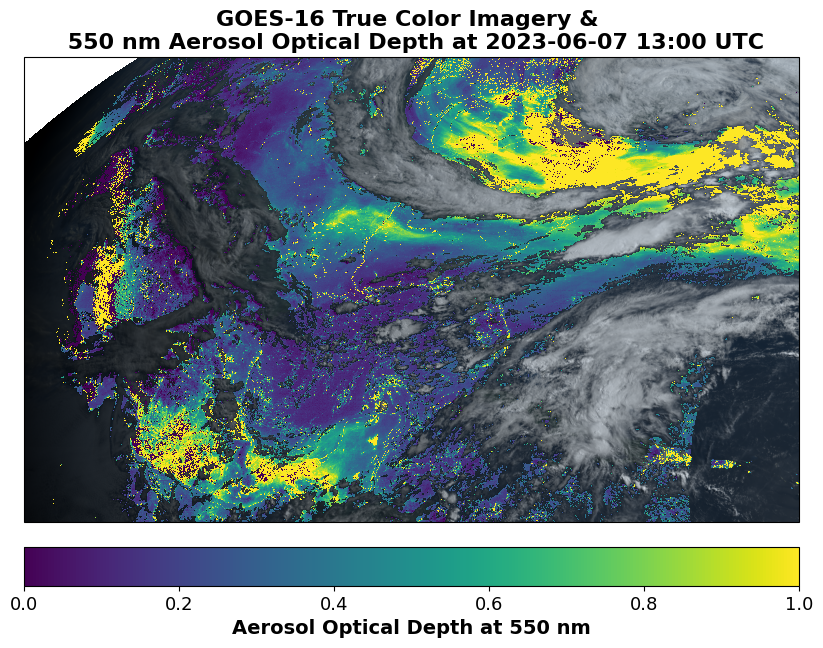

In [5]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
nc = getattr(G16_true.rgb, 'NaturalColor')()

# get bounds based on min and max values of lon and lat
lon_min = nc.x.min().values
lon_max = nc.x.max().values
lat_min = nc.y.min().values
lat_max = nc.y.max().values

# plot data
ax.imshow(nc, origin='upper', extent=[lon_min, lon_max, lat_min, lat_max]) # plot the true color field
mesh = ax.pcolormesh(x, y, aod, cmap='viridis', vmin=0, vmax=1, transform=ccrs.PlateCarree()) # plot the aod field
cbar = plt.colorbar(mesh, ax=ax, pad=0.04, orientation='horizontal') # set a colorbar
cbar.set_label('Aerosol Optical Depth at 550 nm',fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=13)
plt.title('GOES-16 True Color Imagery & \n 550 nm Aerosol Optical Depth at 2023-06-07 13:00 UTC', fontsize=16, fontweight='bold')
plt.savefig('GOES_true_aod.png', bbox_inches="tight", dpi=800)

## Run a loop to extract 24 hours of imagery

In [6]:
dates = ['2023-6-7'] # set time period
hours = list(range(18, 24, 1)) # times of interest: every hour -- NOTE: consider computational expense while running this section of the notebook!
minutes = list(range(0, 60, 10)) # every 10 minutes -- NOTE: consider computational expense while running this section of the notebook!

In [ ]:
# plot for both days (6 and 7 June 2023) for certain hours every 10 minutes
for date in dates:
    if date == '2023-6-6':
        hours = hours
    
    for hour in hours:
        for minute in minutes:
            # declare GOES-16 time and products
            G16_true = GOES(satellite=16).nearesttime(f'{date} {hour}:{minute}')
            G16_aod = GOES(satellite=16, product="ABI-L2-AODC").nearesttime(f'{date} {hour}:{minute}')
            # coordinates for extent
            x = G16_aod['x'].values
            y = G16_aod['y'].values
            
            aod = np.ma.masked_invalid(G16_aod['AOD'].values)
            fig = plt.figure(figsize=(10,8))
            ax = plt.axes(projection=ccrs.PlateCarree())
            # use imshow
            nc = getattr(G16_true.rgb, 'NaturalColor')()
            # Get geographic bounds
            lon_min = nc.x.min().values
            lon_max = nc.x.max().values
            lat_min = nc.y.min().values
            lat_max = nc.y.max().values
            
            ax.imshow(nc, origin='upper', extent=[lon_min, lon_max, lat_min, lat_max]) # plot true color field
            mesh = ax.pcolormesh(x, y, aod, cmap='viridis', vmin=0, vmax=1, transform=ccrs.PlateCarree()) # plot aod field
            
            cbar = plt.colorbar(mesh, ax=ax, pad=0.04, orientation='horizontal')
            cbar.set_label('Aerosol Optical Depth at 550 nm',fontsize=14, fontweight='bold')
            cbar.ax.tick_params(labelsize=13)
            if minute == 0:
                plt.title(f'GOES-16 True Color Imagery & \n 550 nm Aerosol Optical Depth at {date} {hour}:0{minute}Z', fontsize=16, fontweight='bold')
                plt.savefig(f'/home/jovyan/Desktop/Scripts/{date} {hour}:0{minute}_GOES_true_aod.png', bbox_inches="tight", dpi=800)
            else:
                plt.title(f'GOES-16 True Color Imagery & \n 550 nm Aerosol Optical Depth at {date} {hour}:{minute}Z', fontsize=16, fontweight='bold')
                plt.savefig(f'/home/jovyan/Desktop/Scripts/{date} {hour}:{minute}_GOES_true_aod.png', bbox_inches="tight", dpi=800)

 👮🏻‍♂️ File already exists. Do not overwrite: /home/jovyan/data/noaa-goes16/ABI-L2-MCMIPC/2023/158/18/OR_ABI-L2-MCMIPC-M6_G16_s20231581801181_e20231581803554_c20231581804097.nc
📦 Finished downloading [1] files to [/home/jovyan/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   